@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
# General-level imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Special-case libraries/modules
import piecewise_regression

# Personal/local libraries and module imports
import reg


In [2]:
path = f"data{os.sep}"
filenames = ["phys_data_2023-03-12_side0.csv",
            "simulated_event_profiles.csv",
            "solo_ept_sun_e.csv"]

index_col_names = ["TimeUTC",
                  "datetime",
                  "datetime"]

index = 0

df = pd.read_csv(f"{path}{filenames[index]}", parse_dates=True, index_col=index_col_names[index])

display(df)

P1     P2    P3    P4     P5     P6     P7      P8  \
TimeUTC                                                                     
2023-03-12 00:00:00   0.0   0.00  0.00  0.00  0.000  0.000  0.000  0.0000   
2023-03-12 00:00:24   0.0   0.00  0.00  0.00  0.000  0.000  0.000  0.0000   
2023-03-12 00:00:48   0.0   0.00  0.00  0.00  0.000  0.000  0.000  0.0000   
2023-03-12 00:01:12   0.0   0.00  0.00  0.00  0.000  0.000  0.000  0.0000   
2023-03-12 00:01:36   0.0   0.00  0.00  0.00  0.000  0.000  0.000  0.0000   
...                   ...    ...   ...   ...    ...    ...    ...     ...   
2023-03-14 23:58:00  61.2   7.14  3.95  3.42  1.590  0.000  0.142  0.0671   
2023-03-14 23:58:24  24.5  14.30  9.88  5.70  1.590  0.954  0.142  0.0671   
2023-03-14 23:58:48  61.2  21.40  9.89  2.28  1.590  0.000  0.142  0.0671   
2023-03-14 23:59:12  48.9  14.30  5.93  5.70  1.590  0.954  0.000  0.0671   
2023-03-14 23:59:36  61.2   7.14  0.00  1.14  0.795  1.190  0.000  0.0000   

                         P9      E1      E2      E3     E4    E5     E6  \
TimeUTC                                                                   
2023-03-12 00:00:00  0.0000     0.0     0.0   11.40    0.0   0.0  0.000   
2023-03-12 00:00:24  0.0144   167.0     0.0    7.58    0.0   0.0  0.000   
2023-03-12 00:00:48  0.0000     0.0     0.0    0.00    0.0   0.0  0.627   
2023-03-12 00:01:12  0.0000   112.0    17.6    0.00    0.0   0.0  0.313   
2023-03-12 00:01:36  0.0000    55.8     0.0    0.00    0.0   0.0  0.000   
...                     ...     ...     ...     ...    ...   ...    ...   
2023-03-14 23:58:00  0.0144  7090.0  2200.0  865.00  325.0  10.5  0.314   
2023-03-14 23:58:24  0.0000  5030.0  1920.0  819.00  309.0  21.0  0.000   
2023-03-14 23:58:48  0.0000  6480.0  2360.0  895.00  262.0  16.8  0.314   
2023-03-14 23:59:12  0.0000  6420.0  2390.0  895.00  325.0  14.7  0.000   
2023-03-14 23:59:36  0.0000  6700.0  1810.0  827.00  325.0  23.1  0.627   

                        E7    DT          PA  
TimeUTC                                       
2023-03-12 00:00:00  0.000  0.00   86.490453  
2023-03-12 00:00:24  0.000  0.00   81.321720  
2023-03-12 00:00:48  0.000  0.00   69.690026  
2023-03-12 00:01:12  0.000  0.00   70.727876  
2023-03-12 00:01:36  0.000  0.00   68.520445  
...                    ...   ...         ...  
2023-03-14 23:58:00  0.000  1.29  100.899747  
2023-03-14 23:58:24  0.088  1.12   84.530333  
2023-03-14 23:58:48  0.000  1.46   95.456014  
2023-03-14 23:59:12  0.000  1.29  101.019541  
2023-03-14 23:59:36  0.000  1.17  107.450316  

[10800 rows x 18 columns]

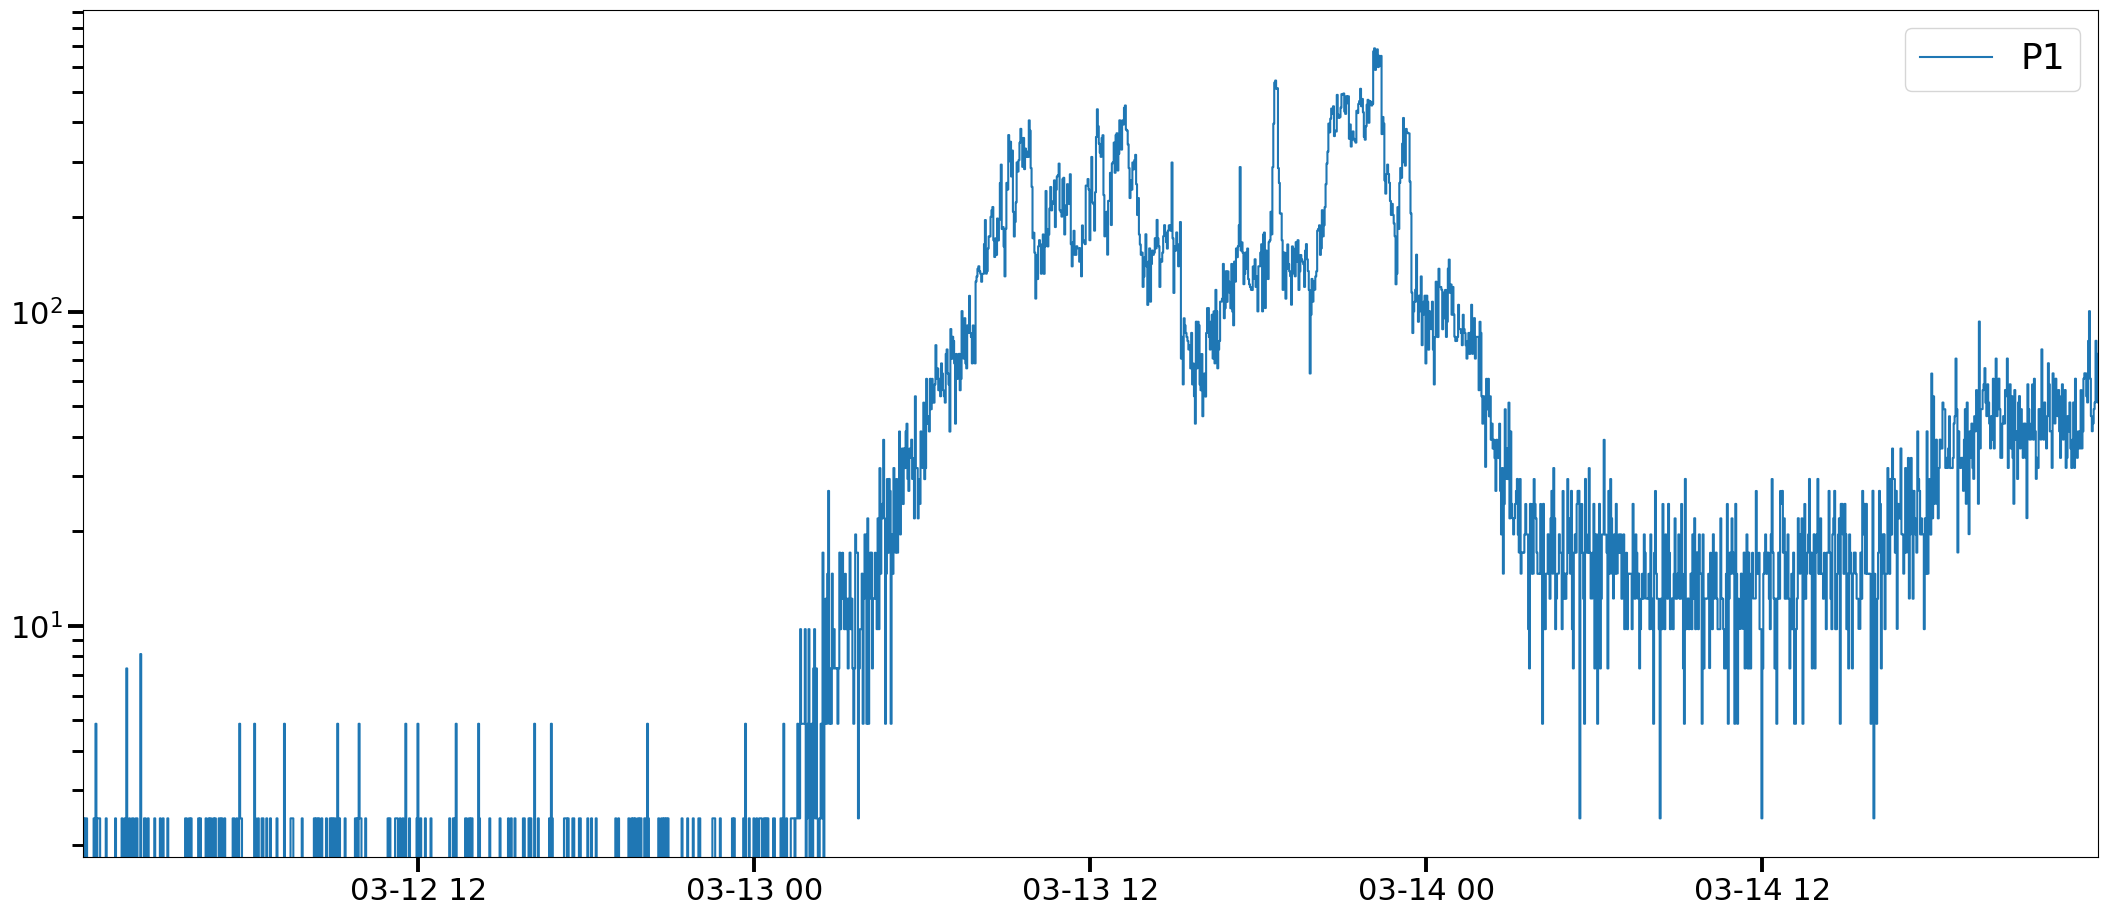

In [3]:
channel = "P1"
reg.quicklook(data=df, channel=channel, resample="2 min")

In [29]:
import ipympl
%matplotlib ipympl

In [30]:
class Eventholder:

    def __init__(self, x=0., y=0.):
        self.x = x
        self.y = y

    def set_xy(self, x, y):
        self.x = x
        self.y = y

ev = Eventholder()

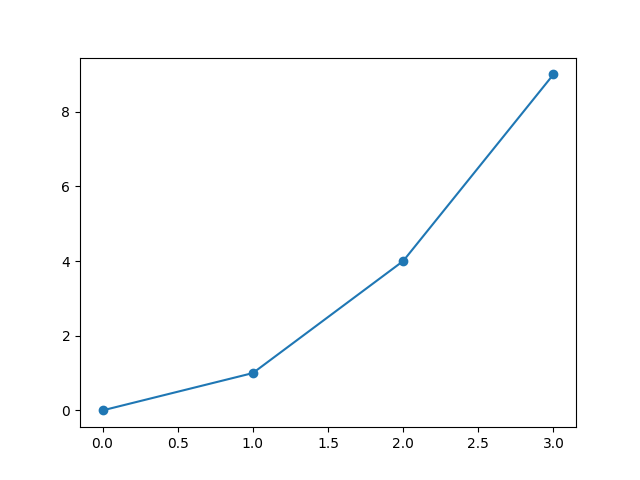

In [48]:
# Global variable to store the clicked coordinates
clicked_coords = []

def onclick(event):
    """Callback function to store the coordinates on mouse click."""
    if event.xdata is not None and event.ydata is not None:
        clicked_coords.append((event.xdata, event.ydata))
        print(f"Clicked at: ({event.xdata:.2f}, {event.ydata:.2f})")

# Create a sample plot
fig, ax = plt.subplots()
ax.plot([0, 1, 2, 3], [0, 1, 4, 9], marker='o')

# Connect the event handler to the figure
fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

# Now, clicked_coords will contain the clicked (x, y) points

In [50]:
clicked_coords

[(np.float64(1.4866935483870969), np.float64(5.140624891008649)),
 (np.float64(2.152016129032258), np.float64(5.970982033865791)),
 (np.float64(2.0056451612903223), np.float64(3.8281248910086494)),
 (np.float64(1.8193548387096774), np.float64(1.7120534624372206)),
 (np.float64(2.1453629032258066), np.float64(0.587053462437221)),
 (np.float64(2.8372983870967743), np.float64(0.7209820338657922))]

0.0 0.0


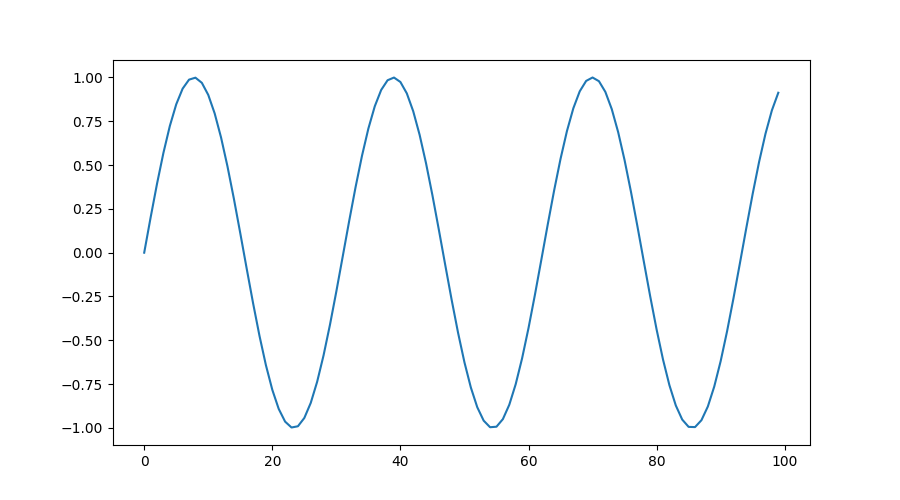

In [41]:
print(ev.x, ev.y)

def record_click(event, ev):
    """
    Returns click coordinates on the plot
    """
    x, y = event.xdata, event.ydata
    ev.set_xy(x=x, y=y)

#fig.canvas.mpl_connect("button_press_event", record_click)

fig, ax = plt.subplots(figsize=(9,5))

# Always hides the toolbar
fig.canvas.toolbar_visible = False

ax.plot(np.sin(np.linspace(0,20,100)))

def on_press(event):
    print('you pressed', event.button, event.xdata, event.ydata)

cid = fig.canvas.mpl_connect('button_press_event', on_press)



In [47]:
#print(ev.x, ev.y)
display(on_press)

<function __main__.on_press(event)>

In [8]:
 !python -c "import sys; print('\n',sys.version); import ipympl; print('ipympl version:', ipympl.__version__)" && jupyter --version && jupyter nbextension list && jupyter labextension list



 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:27) [GCC 11.2.0]
ipympl version: 0.9.6
Selected Jupyter core packages...
IPython          : 8.30.0
ipykernel        : 6.29.5
ipywidgets       : 8.1.5
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.14.1
jupyterlab       : 4.3.4
nbclient         : 0.8.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.3.2
qtconsole        : 5.6.1
traitlets        : 5.14.3
Known nbextensions:
  config dir: /home/chospa/.local/etc/jupyter/nbconfig
    notebook section
      jupyterlab-plotly/extension  enabled 
      - Validating: OK
  config dir: /usr/local/etc/jupyter/nbconfig
    tree section
      ipyparallel/main  enabled 
      - Validating: OK
  config dir: /etc/jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
JupyterLab v4.3.4
/home/chospa/anaconda3/envs/regs/share/jupyter/labextensions
        dask-labextension v7.0.0 enabled OK 

Data selection: 2023-03-12 00:02:30, 2023-03-13 13:07:30
Regression converged: True


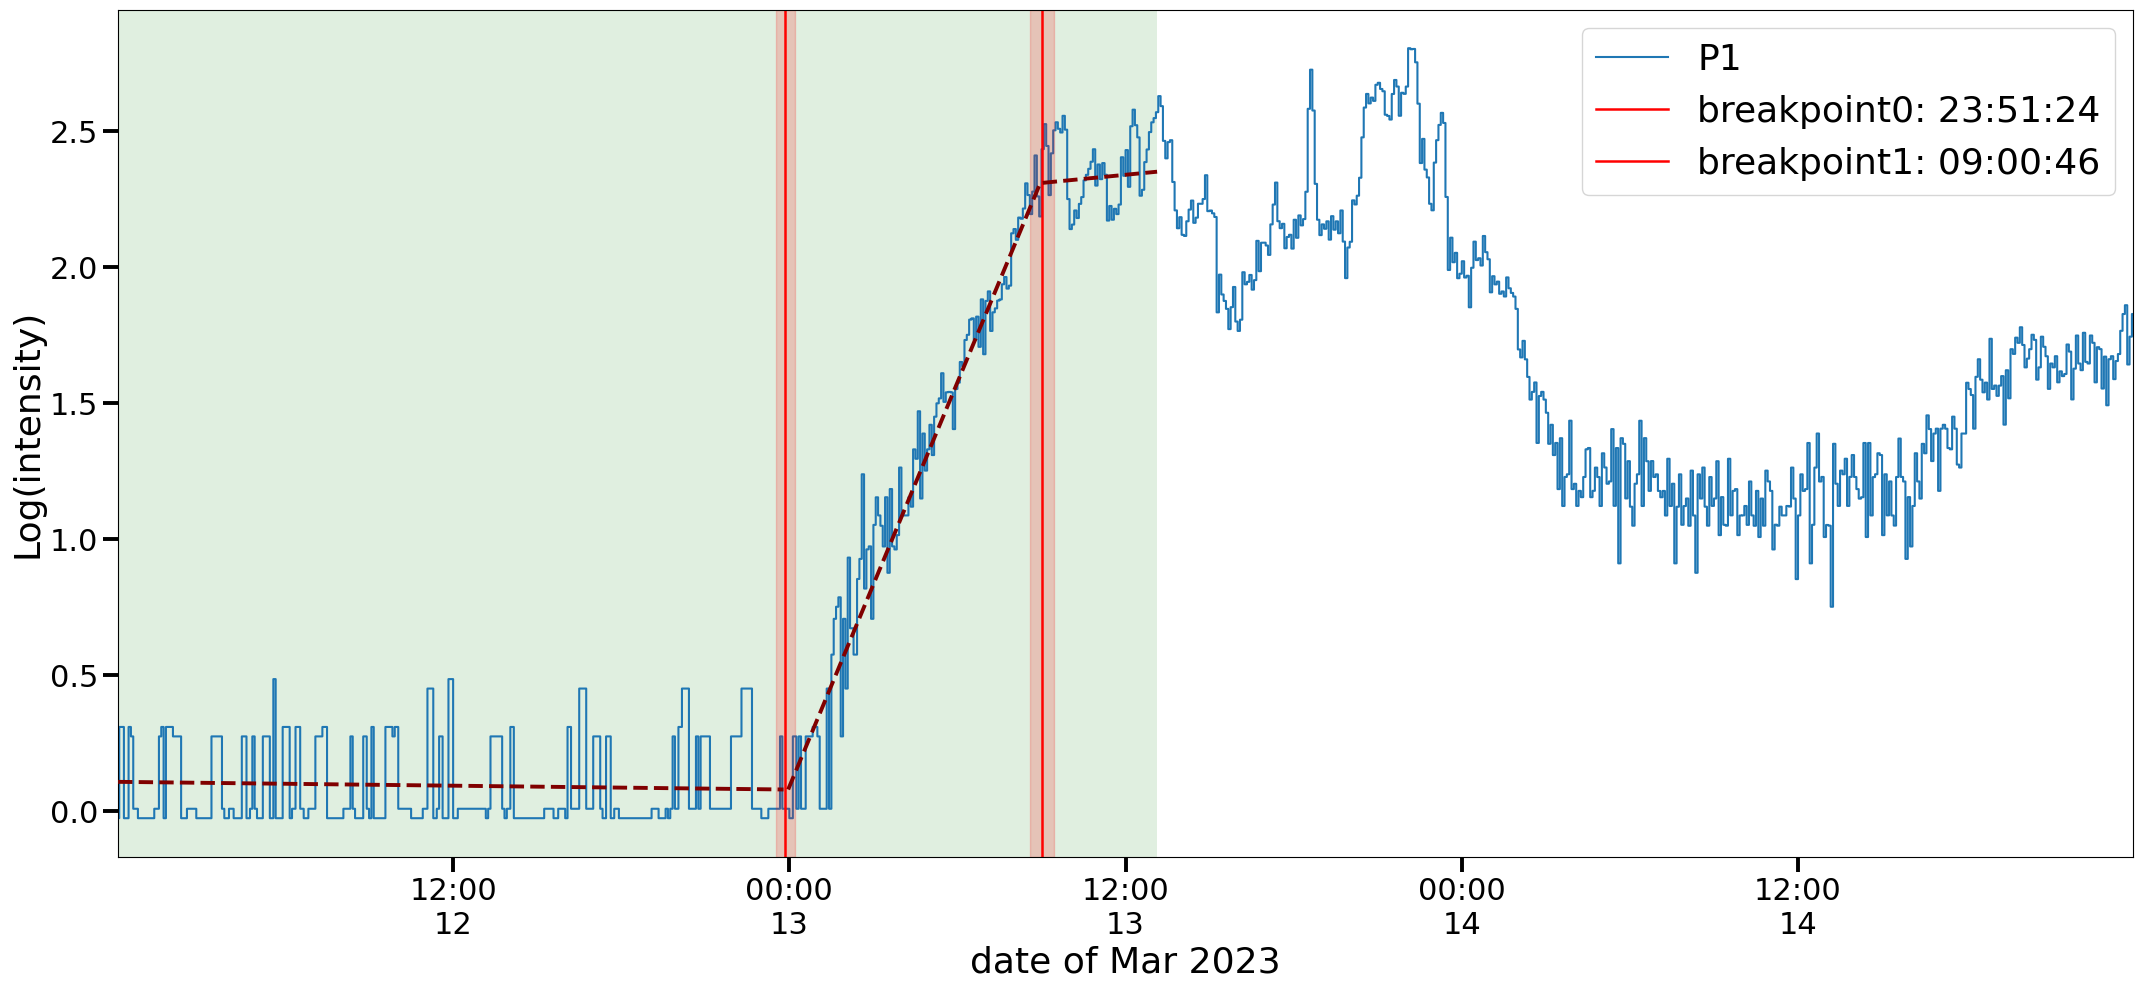

In [7]:
results  = reg.workflow(data=df, channel=channel, window=30, threshold=1, diagnostics=True, breaks=2,
                              index_choice="time_s", resample="5 min", plot_style="step")

In [10]:
results

{'const': np.float64(13849.020461591277),
 'alpha0': np.float64(-8.4292938105267e-06),
 'alpha1': np.float64(0.00043705435215464695),
 'alpha2': np.float64(5.444736736018871e-05),
 'breakpoint0': Timestamp('2022-01-20 06:31:58.271812916'),
 'breakpoint1': Timestamp('2022-01-20 07:34:06.980514050'),
 'breakpoint0_errors': (Timestamp('2022-01-20 06:24:03.272355795'),
  Timestamp('2022-01-20 06:39:53.271270037')),
 'breakpoint1_errors': (Timestamp('2022-01-20 07:24:37.476143360'),
  Timestamp('2022-01-20 07:43:36.484884739')),
 'series': datetime
 2022-01-20 00:03:00.451561    2.906719
 2022-01-20 00:08:00.451561    2.684871
 2022-01-20 00:13:00.451561    2.751818
 2022-01-20 00:18:00.451561    2.605689
 2022-01-20 00:23:00.451561    2.860962
                                 ...   
 2022-01-20 11:58:00.451561    4.889443
 2022-01-20 12:03:00.451561    4.925420
 2022-01-20 12:08:00.451561    4.927909
 2022-01-20 12:13:00.451561    4.903231
 2022-01-20 12:18:00.451561    4.940947
 Freq: 5mi

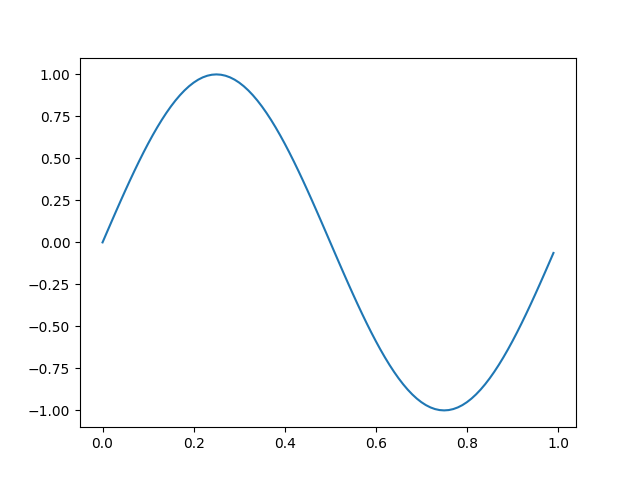

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.backend_bases import MouseButton

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)


def on_move(event):
    if event.inaxes:
        print(f'data coords {event.xdata} {event.ydata},',
              f'pixel coords {event.x} {event.y}')


def on_click(event):
    if event.button is MouseButton.LEFT:
        print('disconnecting callback')
        plt.disconnect(binding_id)


binding_id = plt.connect('motion_notify_event', on_move)
plt.connect('button_press_event', on_click)

plt.show()

/tmp/ipykernel_27357/3961219091.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig, self.ax = plt.subplots()


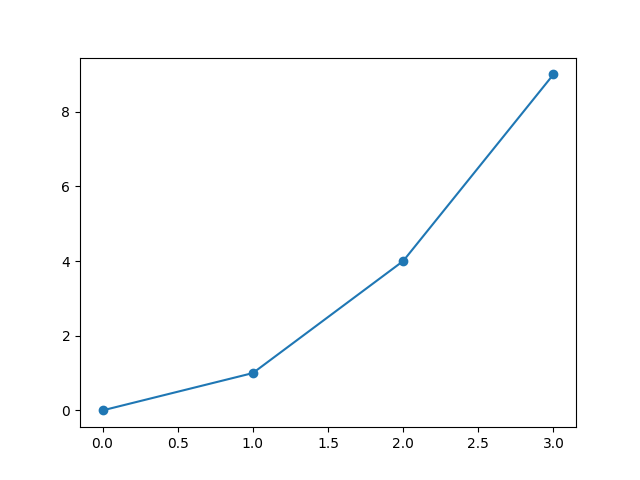

Collected coordinates: []


In [51]:
class ClickablePlot:
    def __init__(self):
        self.clicked_coords = []  # Store clicked points
        self.fig, self.ax = plt.subplots()
        self.ax.plot([0, 1, 2, 3], [0, 1, 4, 9], marker='o')
        self.fig.canvas.mpl_connect('button_press_event', self.onclick)

    def onclick(self, event):
        """Store coordinates when clicked."""
        if event.xdata is not None and event.ydata is not None:
            self.clicked_coords.append((event.xdata, event.ydata))
            print(f"Clicked at: ({event.xdata:.2f}, {event.ydata:.2f})")

    def show(self):
        """Display the plot."""
        plt.show()

    def get_coords(self):
        """Retrieve stored coordinates."""
        return self.clicked_coords

# Usage
plot = ClickablePlot()
plot.show()
print("Collected coordinates:", plot.get_coords())

In [53]:
plot.get_coords()

[(np.float64(1.6796370967741936), np.float64(1.6026790073939732)),
 (np.float64(1.7395161290322583), np.float64(2.7544647216796876)),
 (np.float64(1.6264112903225807), np.float64(5.781250435965401)),
 (np.float64(1.6264112903225807), np.float64(5.781250435965401)),
 (np.float64(1.6264112903225807), np.float64(5.781250435965401)),
 (np.float64(0.981048387096774), np.float64(6.290179007393974)),
 (np.float64(0.9677419354838709), np.float64(4.3348218645368295)),
 (np.float64(1.553225806451613), np.float64(4.013393293108258)),
 (np.float64(1.6397177419354838), np.float64(2.0312504359654016)),
 (np.float64(1.6663306451612905), np.float64(3.39732186453683)),
 (np.float64(1.9590725806451612), np.float64(4.924107578822545))]